<a href="https://colab.research.google.com/github/cris1dev/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/TelecomX_LATAM%20avance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Se procede a extraer los datos utilizando utilizando las librerías "request" (para obtener los datos desde un servidor) y "pandas" (para obtener data frame del archivo .json)

In [32]:
import requests
import pandas as pd

In [33]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [34]:
#Se aplanan los datos anidados (diccionarios dentro de dciccionarios) para visualizarlos en un df y posteriomente analizar la composición del df

df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


🔍 **Análisis de la Estructura de los Datos**
Los datos están organizados en un formato jerárquico (diccionario dentro de diccionario), conteniendo la siguiente información:

1. **Identificación del Cliente** - `'customerID'`: Identificador único del cliente.
* `'Churn'`: Indica si el cliente canceló el servicio (`Yes` o `No`).


2. **Información del Cliente** (`'customer'`)
* `'gender'`: Género del cliente (`Male` o `Female`).
* `'SeniorCitizen'`: Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
* `'Partner'`: Si el cliente tiene pareja.
* `'Dependents'`: Si el cliente tiene dependientes.
* `'tenure'`: Tiempo de permanencia como cliente (en meses).


3. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: Indica si el cliente posee servicio de teléfono (`Yes` o `No`).
* `'MultipleLines'`: Si posee múltiples líneas telefónicas.


4. **Servicios de Internet** (`'internet'`)
* Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


5. **Información de la Cuenta** (`'account'`)
* `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: Si el cliente recibe facturas electrónicas.
* `'PaymentMethod'`: Método de pago (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges'`:
* `'Monthly'`: Valor mensual cobrado.
* `'Total'`: Valor total pagado por el cliente.

#🔧 Transformación

In [35]:
#Se verifican las columnas de datos, cantidades, cantidad de datos nulos y el tipo de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**VERIFICACIONES**

1. Verificando valores unicos

In [36]:
#Importa encontrar valores únicos de cada columna, aportarán valor si son menores a 50 valores únicos

for col in df.columns:
  print(f'{col}: {df[col].nunique()}')
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

customerID: 7267
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet.OnlineBackup: 3
['Yes' 'No' 'No internet service']
--------------------------------------------------
internet.DeviceProtecti

2. Valores Duplicados

In [37]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0



3. Valores nulos

In [38]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


4. Valores vacíos o en blanco

In [60]:
#Identificar y sumar la cantidad de valores vacios por categoría

df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
id,0
Churn,0
genero,0
tiene +60,0
posee_pareja,0
posee_dependientes,0
tiempo_contrato,0
servicio_telefono,0
multiples_lineas,0
tipo_internet,0


**TRANSFORMACIONES**

1. Cambiando la columna "account.Charges.Total" a Float

In [40]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)


float64


2. Eliminación de valores vacios en la columna Churn

In [41]:
df= df[df['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df))

Número de filas después de eliminar las vacías en 'Churn': 7043


3. Verificación de vacíos o en blanco

In [42]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [43]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [44]:
df = df.dropna(subset=['account.Charges.Total'])

In [45]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


**4. Columna de cuentas diarias (Opcional)**

In [46]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


## Estandarización español

In [47]:
#Renombrar columnas para mejorar su comprensión

columnas = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [48]:
#Traducción de columnas a español para facilitar su comprensión

df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()


,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [49]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [50]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.796667


In [51]:
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fiber optic,...,No,No,No,Sí,Mensual,Yes,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.261667


#📊 Carga y análisis

1.Analisis Descriptiva

In [52]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


2. Distribución de la Evasión

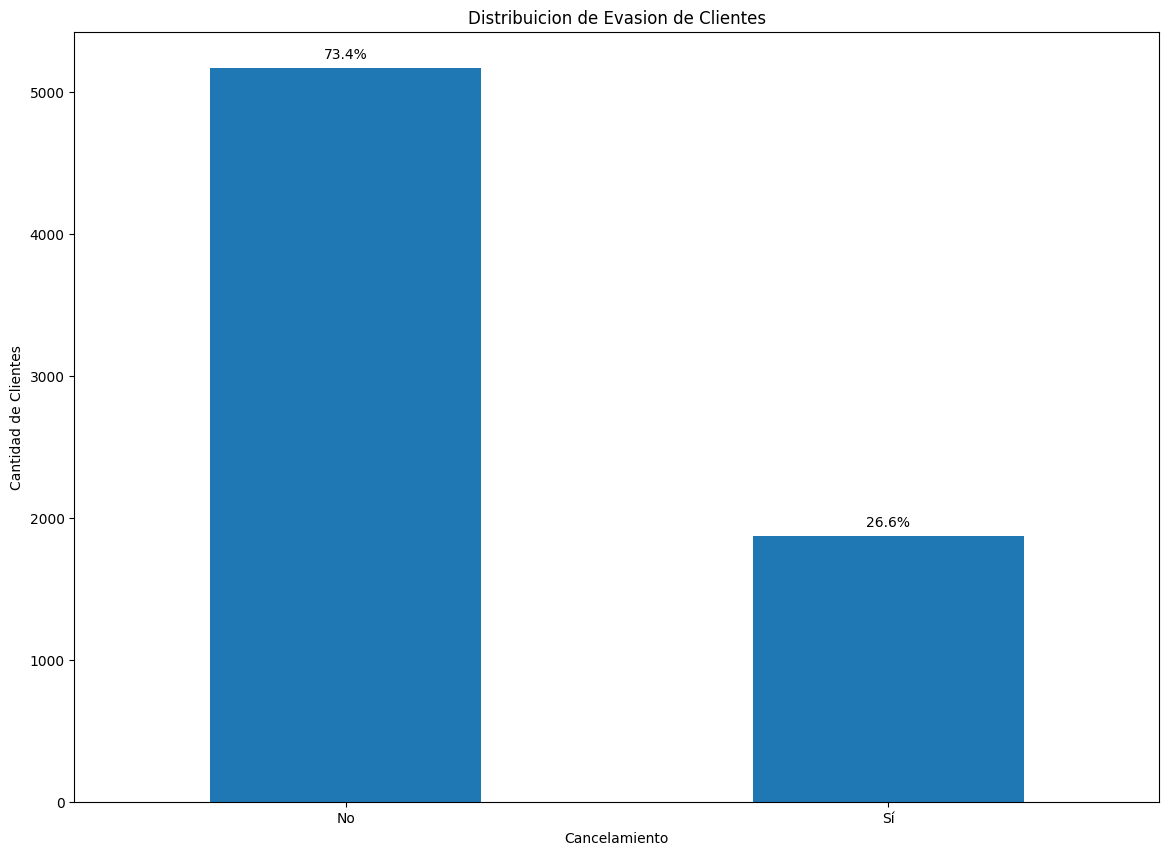

In [53]:
#Representación Gráfica de Churn( quienes cancelaron su plan y quienes no)
#Considerar la posibilidad de implementar tabla dinámica

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

ax = churn_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

2.1 Conteo por género

In [54]:
import plotly.express as px

In [55]:
px.histogram(df, x = 'genero', text_auto = True, color = 'Churn', barmode = 'group')

2.2 Conteo por tiempo de contrato

In [56]:
px.histogram(df, x = 'tiempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

2.3 Conteo tipo de contrato

In [57]:
px.histogram(df, x = 'tipo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

2.4 Conteo por tipo de internet

In [58]:
px.histogram(df, x = 'tipo_internet',  text_auto = True, color = 'Churn', barmode = 'group')

2.5 Conteo por método de pago

In [59]:
px.histogram(df, x = 'metodo_pago',  text_auto = True, color = 'Churn', barmode = 'group')

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀